In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the table
db=pd.read_csv("http://bit.ly/w-data")
db.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
db.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


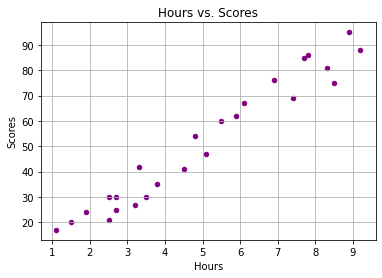

In [4]:
#Visualize
db.plot.scatter(x="Hours",y="Scores",color="purple")
plt.title("Hours vs. Scores")
plt.grid()
plt.show()

In [5]:
#Split dataset into train and test
from sklearn.model_selection import train_test_split
X = db.iloc[:, :-1].values  
y = db.iloc[:, 1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    test_size = 0.3, random_state = 0)


In [6]:
print("X Training set")
print(X_train)
print("Y Training set")
print(y_train)

X Training set
[[6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
Y Training set
[76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


**TRAINING THE DATASET**

In [7]:
#Linear Regression

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

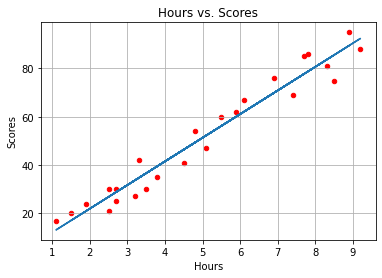

In [8]:
#PLot the graph

line = regressor.coef_*X+regressor.intercept_

db.plot.scatter(x="Hours",y="Scores",color="red")
plt.plot(X,line)
plt.grid()
plt.title("Hours vs. Scores")
plt.show()


---

**MAKING PREDICTIONS**

In [9]:
#Making Predictions

y_pred = regressor.predict(X_test)
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


Text(0, 0.5, 'Marks')

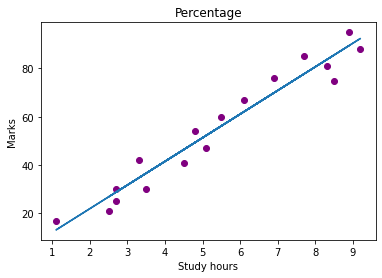

In [10]:
#Visualise

plt.scatter(X_train, y_train, color ='purple')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Percentage')
plt.xlabel("Study hours")
plt.ylabel("Marks")

Text(0, 0.5, 'Marks')

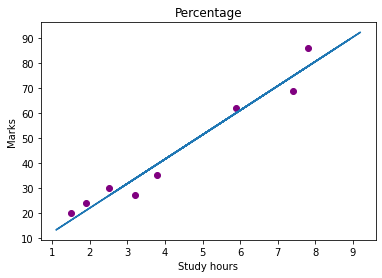

In [11]:
#Visualise test
plt.scatter(X_test, y_test, color ='purple')
plt.plot(X_train, regressor.predict(X_train))
plt.title('Percentage')
plt.xlabel("Study hours")
plt.ylabel("Marks")

COMPARING SCORES

In [12]:
print("Actual Scores vs Predicted Scores")
print("")
db_compare = pd.DataFrame({"Actual Score":y_test,"Predicted Score":y_pred})
db_compare

Actual Scores vs Predicted Scores



,Actual Score,Predicted Score
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


# **Predicted score** if a student studies for 9.25 hours/day 

In [13]:
no_hours = np.array([[9.25]])
pred_score = regressor.predict(no_hours)
print("No of Hours = {}".format(no_hours[0][0]))
print("Predicted Score = {}".format(pred_score[0]))

No of Hours = 9.25
Predicted Score = 92.91505723477056


Evaluating the metrics

In [14]:
import sklearn.metrics as metrics

explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)

print('Explained Variance: ', round(explained_variance,4))    
print('mean_squared_log_error: ', round(mean_squared_log_error,4))
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('MSE: ', round(mse,4))
print('RMSE: ', round(np.sqrt(mse),4))

Explained Variance:  0.9569
mean_squared_log_error:  0.0158
r2:  0.9568
MAE:  4.4197
MSE:  22.9651
RMSE:  4.7922




---

